# (Prosper Loan - Data Visualization)
## by Federico Finetti

## Preliminary Wrangling

> The dataset that will be analysed here below contains 113,937 loans, with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. We will not analyse all the 81 variables, but just the ones that will let us shade the light on the key questions that will follow later on.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
LoanDataRaw = pd.read_csv('prosperLoanData.csv')
LoanDataRaw.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
LoanDataRaw.shape

(113937, 81)

In [4]:
LoanDataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

> The dataset is composed by 113937 rows and 81 columns. The columns are composed by different types of data: mainly float, but also integers, objects and boolean values.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in this dataset are:
>> "**ProsperScore**": as it is the main result of the risk parameters evaluation.
>
>> "**BorrowerRate**": as it is the value which should reward the company, proportionally to the risks taken, allowing it to make money without running out of business for default.
>
>> "**LoanStatus**": as it tells us what is the real situation about each loan, and what ultimately defines the ability for the company to make money out of its risk evaluation abilities.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help to support my investigations into the features of interest are the following ones:
>> "**DebtToIncomeRatio**": the higher this value is, the higher should be the score as it is proportional to the likelyhood for the borrower to pay the debt back.
>
>> "**StatedMonthlyIncome**": the more money someone earns, the more likely that this person will be able to pay the debt back.
>
>> "**IncomeVerifiable**": if the income is verifiable, this is an additional reassurance that the company can trust the "StatedMonthlyIncome" value, therefore have a better evaluation of the risk. Bottomline: having this value "True", keeping all the other variables constant, would decrease the risk of default.
>
>> "**Term**": with the term of the loan, would also increase the risk of insolvency of the borrower, therfore we would expect the interest rate to increase and the borrower score to decrease
>
>> "**EmploymentStatus**": we would expect that someone empoloyd is assessed as a lower risk borrowrs, compared to somenone who is unemployes, as the first one could count on a source of income, while the second one can not
>
>> "**EmploymentStatusDuration**": the longer a borrower has held a job, the less risky he sould be, as this would be a sign of stability and lower risk of losing the job
>
>> "**AmountDelinquent**": the higher the amount, the higher should be the risk
>
>> "**DelinquenciesLast7Years**": the more the occasions of telinquency, the higher should be the risk
>
>> "**Recommendations**": the higher the number of recommendations, the lower should be the risk

## Dataset preparation: Cleaning

In [5]:
LoanDataFull = LoanDataRaw.copy()  # make a copy of the original dataset

#### Find and remove the duplicates, with the same "ListingKey" and "ListingNumber"

In [6]:
print(len(LoanDataFull[LoanDataFull.ListingKey.duplicated()]));
LoanDataFull[LoanDataFull.ListingKey.duplicated()].head()

871


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287000000,NaN,36,Current,NaN,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [7]:
LoanDataFull.query('ListingKey == "0F043596202561788EA13D5"') # check in this example that all the fields are duplicated

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.0762,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.0762,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [8]:
print(len(LoanDataFull[LoanDataFull.ListingNumber.duplicated()]));
LoanDataFull[LoanDataFull.ListingNumber.duplicated()].head()

871


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287000000,NaN,36,Current,NaN,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [9]:
LoanDataFull.query('ListingNumber == 1055932')  # check in this example that all the fields are duplicated

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
998,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
57494,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [10]:
# Drop duplicates

ListIndexes = LoanDataFull[LoanDataFull.ListingKey.duplicated()].index
LoanDataNoDupl = LoanDataFull.drop(ListIndexes)
LoanDataNoDupl.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [11]:
# check in the previous example that there is only one row for the "ListingKey" that before was duplicated 
LoanDataNoDupl.query('ListingKey == "0F043596202561788EA13D5"')  

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.0762,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [12]:
# check that the number of rows decreased to the expected number of 113937 - 871 = 113066
len(LoanDataNoDupl)

113066

In [13]:
# Converting "ListingCreationDate" column, from string to date format
LoanDataNoDupl['ListingCreationDate'] = pd.to_datetime(LoanDataNoDupl['ListingCreationDate'])

In [14]:
# Selecting only data with "ListingCreationDate" from August 2009 onwards, 
# as the parameter "ProsperScore" is only applicable since then.

LoanDataSinceAug09 = LoanDataNoDupl.query('ListingCreationDate >= "01-08-2009"')
print(len(LoanDataSinceAug09))
LoanDataSinceAug09.head()

84010


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### Create new dataset with only the variable of interest for the analysis

In [15]:
LoanDataSelect = LoanDataSinceAug09[['ProsperScore', 'BorrowerRate', 'LoanStatus', 'DebtToIncomeRatio',
                                     'StatedMonthlyIncome','IncomeVerifiable','Term','EmploymentStatus',
                                     'EmploymentStatusDuration','AmountDelinquent','DelinquenciesLast7Years',
                                     'Recommendations']]
LoanDataSelect.head(2)

,ProsperScore,BorrowerRate,LoanStatus,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,Term,Occupation,EmploymentStatus,EmploymentStatusDuration,AmountDelinquent,DelinquenciesLast7Years,Recommendations
1,7.0,0.0920,Current,0.18,6125.0,True,36,Professional,Employed,44.0,0.0,0.0,0
3,9.0,0.0974,Current,0.15,2875.0,True,36,Skilled Labor,Employed,113.0,10056.0,14.0,0


In [16]:
LoanDataSelect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84010 entries, 1 to 113936
Data columns (total 13 columns):
ProsperScore                83982 non-null float64
BorrowerRate                84010 non-null float64
LoanStatus                  84010 non-null object
DebtToIncomeRatio           76795 non-null float64
StatedMonthlyIncome         84010 non-null float64
IncomeVerifiable            84010 non-null bool
Term                        84010 non-null int64
Occupation                  82736 non-null object
EmploymentStatus            84010 non-null object
EmploymentStatusDuration    83991 non-null float64
AmountDelinquent            84010 non-null float64
DelinquenciesLast7Years     84010 non-null float64
Recommendations             84010 non-null int64
dtypes: bool(1), float64(7), int64(2), object(3)
memory usage: 8.4+ MB


In [17]:
# Drop all the rows with null values
LoanDataClean = LoanDataSelect.dropna()

In [18]:
LoanDataClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75486 entries, 1 to 113936
Data columns (total 13 columns):
ProsperScore                75486 non-null float64
BorrowerRate                75486 non-null float64
LoanStatus                  75486 non-null object
DebtToIncomeRatio           75486 non-null float64
StatedMonthlyIncome         75486 non-null float64
IncomeVerifiable            75486 non-null bool
Term                        75486 non-null int64
Occupation                  75486 non-null object
EmploymentStatus            75486 non-null object
EmploymentStatusDuration    75486 non-null float64
AmountDelinquent            75486 non-null float64
DelinquenciesLast7Years     75486 non-null float64
Recommendations             75486 non-null int64
dtypes: bool(1), float64(7), int64(2), object(3)
memory usage: 7.6+ MB


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [19]:
# base statistics to decide intervals to use to plot the data

LoanDataClean.describe()

,ProsperScore,BorrowerRate,DebtToIncomeRatio,StatedMonthlyIncome,Term,EmploymentStatusDuration,AmountDelinquent,DelinquenciesLast7Years,Recommendations
count,75486.000000,75486.000000,75486.000000,75486.000000,75486.000000,75486.000000,75486.000000,75486.000000,75486.000000
mean,6.082982,0.193859,0.257995,6002.154343,42.736825,104.615372,974.096945,3.734242,0.016705
std,2.357857,0.074198,0.321923,5117.413749,11.742233,95.818419,7433.367355,9.436055,0.188563
min,1.000000,0.040000,0.000000,0.250000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.134900,0.150000,3583.333333,36.000000,32.000000,0.000000,0.000000,0.000000
50%,6.000000,0.184700,0.220000,5036.250000,36.000000,76.000000,0.000000,0.000000,0.000000
75%,8.000000,0.254900,0.320000,7250.000000,60.000000,150.000000,0.000000,2.000000,0.000000
max,11.000000,0.360000,10.010000,483333.333333,60.000000,755.000000,463881.000000,99.000000,19.000000


#### Sort the ordinal qualitative variable "LoanStatus" and "EmploymentStatus" in order of decreasing risk

In [20]:
LoanDataClean.LoanStatus.value_counts()

Current                   50462
Completed                 17675
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        709
Past Due (31-60 days)       320
Past Due (91-120 days)      277
Past Due (61-90 days)       274
Past Due (16-30 days)       241
FinalPaymentInProgress      185
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

In [21]:
LoanDataClean.EmploymentStatus.value_counts()

Employed         65159
Full-time         7576
Other             2189
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

In [22]:
level_order = ['Defaulted','Chargedoff','Past Due (>120 days)','Past Due (91-120 days)','Past Due (61-90 days)','Past Due (31-60 days)','Past Due (16-30 days)','Past Due (1-15 days)','Current','FinalPaymentInProgress','Completed']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
LoanDataClean['LoanStatus'] = LoanDataClean['LoanStatus'].astype(ordered_cat)

C:\Users\Fede\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
level_order = ['Not employed','Self-employed','Other','Retired','Part-time','Full-time','Employed']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
LoanDataClean['EmploymentStatus'] = LoanDataClean['EmploymentStatus'].astype(ordered_cat)

C:\Users\Fede\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


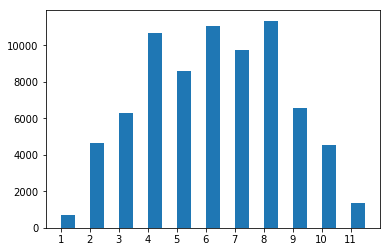

In [24]:
bin_edges = np.arange(1, LoanDataClean['ProsperScore'].max()+1, 0.5) 
plt.hist(data = LoanDataClean, x = 'ProsperScore', bins = bin_edges);
tick_locs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.xticks(tick_locs, tick_locs);

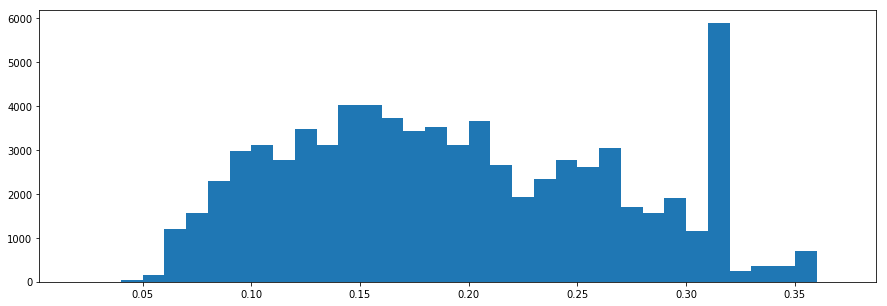

In [25]:
plt.figure(figsize = [15, 5])

bin_edges = np.arange(LoanDataClean['BorrowerRate'].min()-0.02, LoanDataClean['BorrowerRate'].max()+0.02, 0.01) 
plt.hist(data = LoanDataClean, x = 'BorrowerRate', bins = bin_edges); 

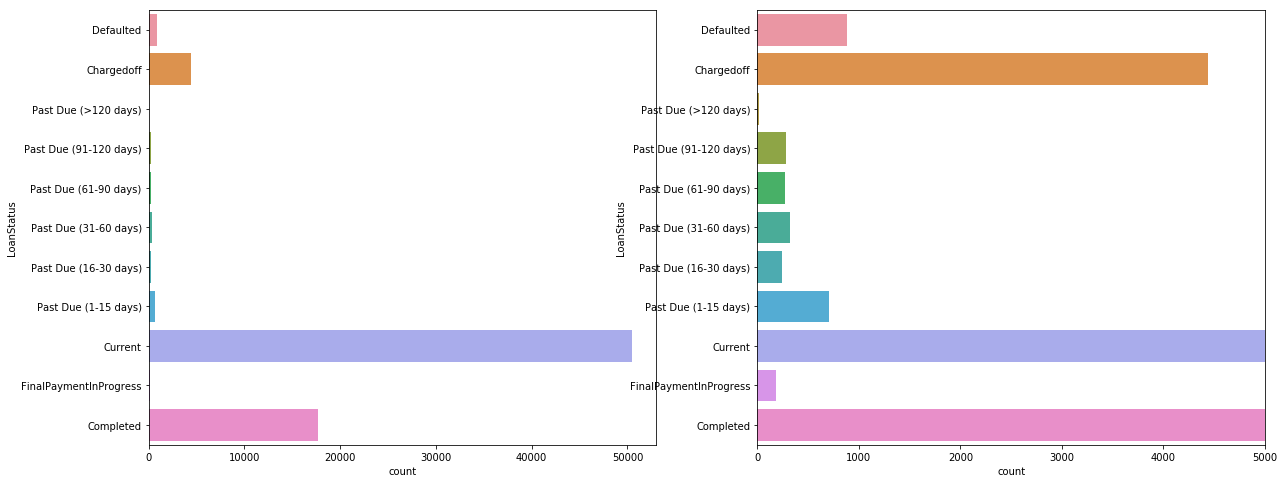

In [26]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
sns.countplot(data = LoanDataClean, y = 'LoanStatus');

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
sns.countplot(data = LoanDataClean, y = 'LoanStatus');
plt.xlim(0,5000);

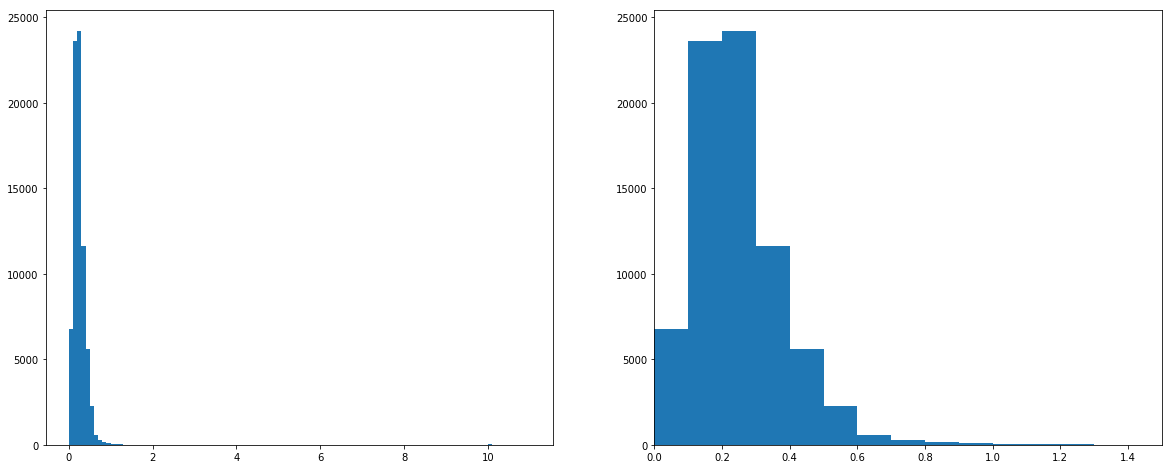

In [27]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, LoanDataClean['DebtToIncomeRatio'].max()+1, 0.1) 
plt.hist(data = LoanDataClean, x = 'DebtToIncomeRatio', bins = bin_edges); 

# histogram on right
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, LoanDataClean['DebtToIncomeRatio'].max()+1, 0.1) 
plt.hist(data = LoanDataClean, x = 'DebtToIncomeRatio', bins = bin_edges); 
plt.xlim(0,1.5);

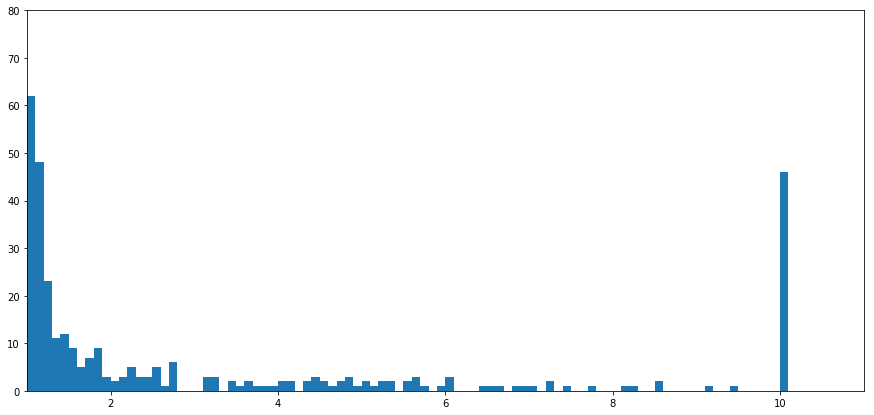

In [28]:
# it looks like all the data are concentred well below the maximum, which is "10", therefore this would require
# further investigation for the outliers
plt.figure(figsize = [15, 7])
bin_edges = np.arange(0, LoanDataClean['DebtToIncomeRatio'].max()+1, 0.1) 
plt.hist(data = LoanDataClean, x = 'DebtToIncomeRatio', bins = bin_edges); 
plt.xlim(1,11);
plt.ylim(0,80);

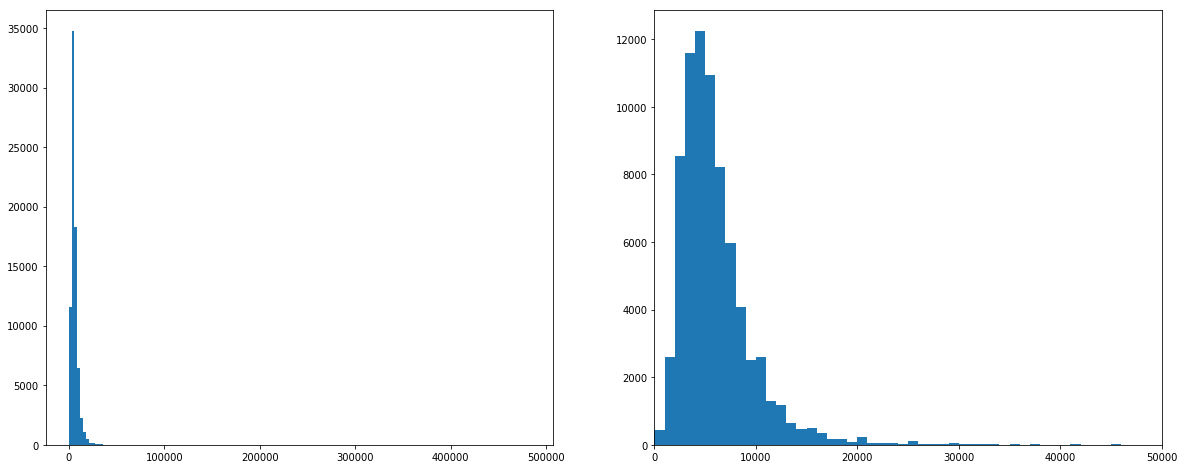

In [32]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, LoanDataClean['StatedMonthlyIncome'].max()+1, 3000) 
plt.hist(data = LoanDataClean, x = 'StatedMonthlyIncome', bins = bin_edges); 

# histogram on right:
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, LoanDataClean['StatedMonthlyIncome'].max()+1, 1000) 
plt.hist(data = LoanDataClean, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlim(0,50000);

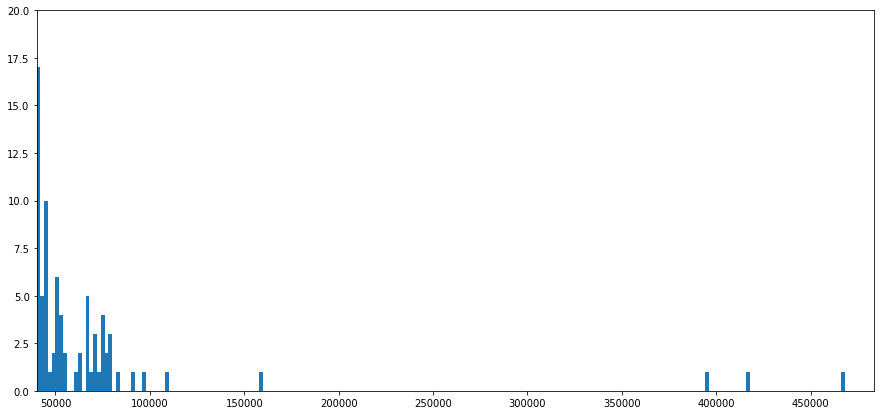

In [46]:
# it looks like all the data are concentred well below the maximum, which is "483333", therefore this would require
# further investigation for the outliers
plt.figure(figsize = [15, 7])
bin_edges = np.arange(0, LoanDataClean['StatedMonthlyIncome'].max()+1, 2000) 
plt.hist(data = LoanDataClean, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlim(40000,LoanDataClean['StatedMonthlyIncome'].max()+1);
plt.ylim(0,20);

True     75438
False       48
Name: IncomeVerifiable, dtype: int64

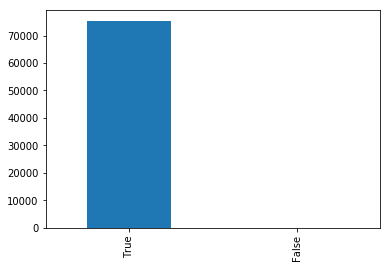

In [48]:
LoanDataClean.IncomeVerifiable.value_counts().plot(kind='bar');
LoanDataClean.IncomeVerifiable.value_counts()

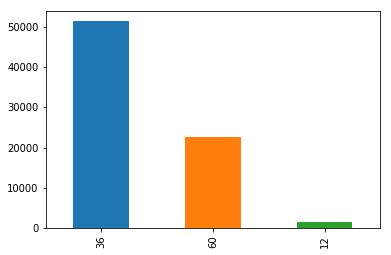

In [56]:
LoanDataClean.Term.value_counts().plot(kind='bar');

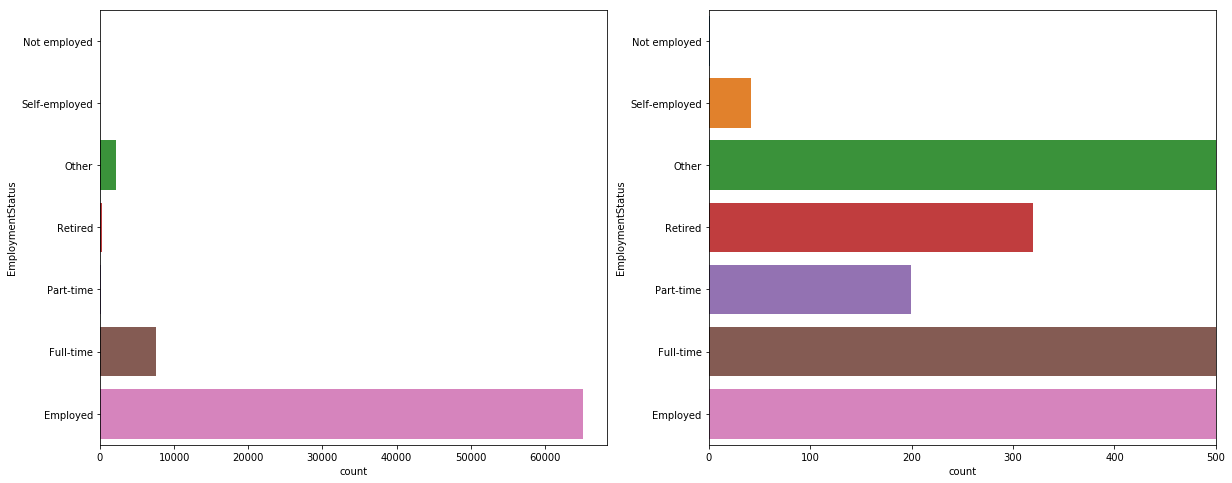

In [64]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
sns.countplot(data = LoanDataClean, y = 'EmploymentStatus');

# histogram on right:
plt.subplot(1, 2, 2)
sns.countplot(data = LoanDataClean, y = 'EmploymentStatus');
plt.xlim(0,500);

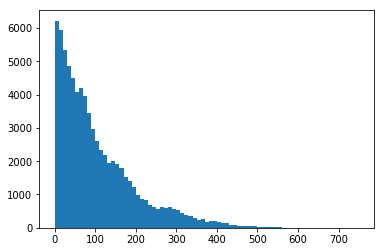

In [65]:
bin_edges = np.arange(0, LoanDataClean['EmploymentStatusDuration'].max()+1, 10) 
plt.hist(data = LoanDataClean, x = 'EmploymentStatusDuration', bins = bin_edges); 

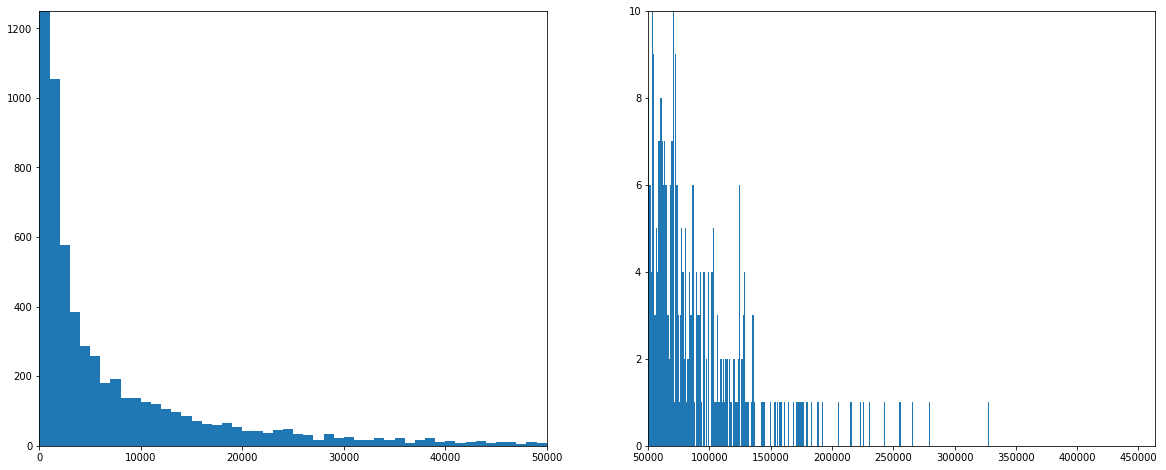

In [79]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, LoanDataClean['AmountDelinquent'].max()+1, 1000) 
plt.hist(data = LoanDataClean, x = 'AmountDelinquent', bins = bin_edges);
plt.ylim(0,1250);
plt.xlim(0,50000);

# histogram on right:
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, LoanDataClean['AmountDelinquent'].max()+1, 1000) 
plt.hist(data = LoanDataClean, x = 'AmountDelinquent', bins = bin_edges);
plt.ylim(0,10);
plt.xlim(50000,LoanDataClean['AmountDelinquent'].max()+1);

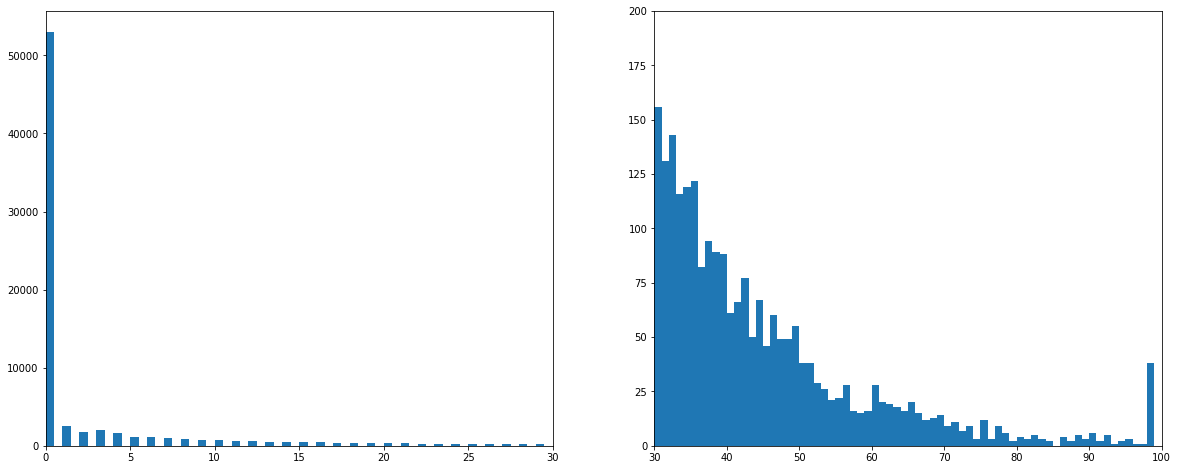

In [88]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, LoanDataClean['DelinquenciesLast7Years'].max()+1, 0.5) 
plt.hist(data = LoanDataClean, x = 'DelinquenciesLast7Years', bins = bin_edges); 
plt.xlim(0,30);

# histogram on right:
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, LoanDataClean['DelinquenciesLast7Years'].max()+1, 1) 
plt.hist(data = LoanDataClean, x = 'DelinquenciesLast7Years', bins = bin_edges); 
plt.ylim(0,200);
plt.xlim(30,LoanDataClean['DelinquenciesLast7Years'].max()+1);

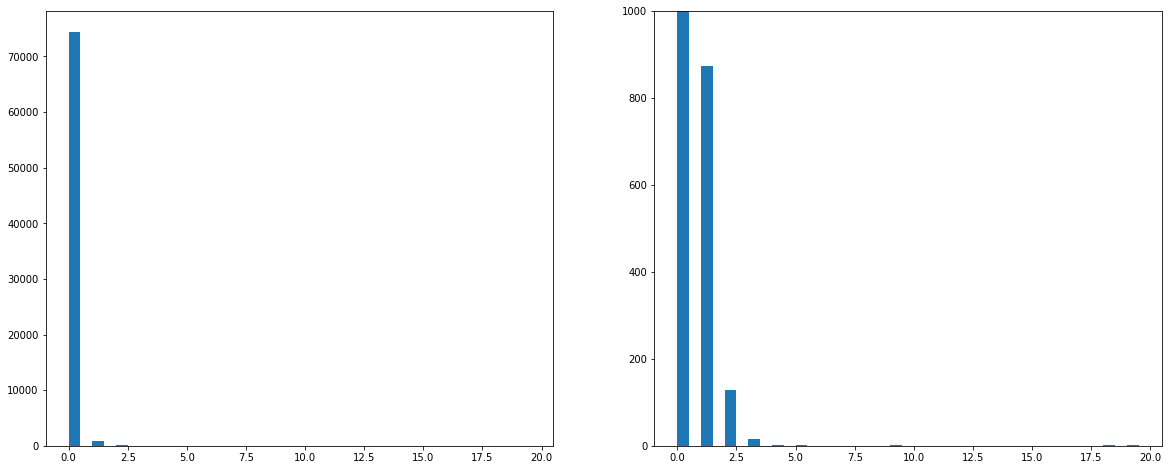

In [93]:




plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, LoanDataClean['Recommendations'].max()+1, 0.5) 
plt.hist(data = LoanDataClean, x = 'Recommendations', bins = bin_edges);  

# histogram on right:
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, LoanDataClean['Recommendations'].max()+1, 0.5) 
plt.hist(data = LoanDataClean, x = 'Recommendations', bins = bin_edges); 
plt.ylim(0,1000);

In [ ]:
bin_edges = np.arange(0, LoanDataClean['Recommendations'].max()+1, 0.5) 
plt.hist(data = LoanDataClean, x = 'Recommendations', bins = bin_edges); 
plt.ylim(0,1000);

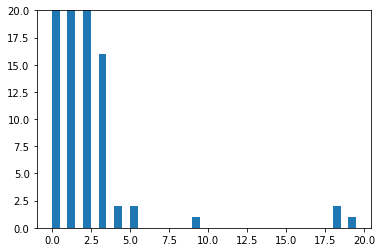

In [95]:
bin_edges = np.arange(0, LoanDataClean['Recommendations'].max()+1, 0.5) 
plt.hist(data = LoanDataClean, x = 'Recommendations', bins = bin_edges); 
plt.ylim(0,20);

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [144]:
# to analyse how good is the risk evaluation of the company, it will be useful to analyse their estimation for
# each loan ("ProsperScore" and "BorrowerRate"), compared to the outcome of each loan, but we will have to 
# analyze only the loans with a conclusi outcome (eg. "Completed", "Defaulted", "Past Due",..), thus we will
# need to remove the "Current" status, as its outcome is still uncertain

LoanDataClean['LoanStatus'].value_counts()

Current                   50462
Completed                 17675
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        709
Past Due (31-60 days)       320
Past Due (91-120 days)      277
Past Due (61-90 days)       274
Past Due (16-30 days)       241
FinalPaymentInProgress      185
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!